In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from sklearn.datasets import make_classification, make_blobs, load_boston
from sklearn.decomposition import PCA
from sklearn.cross_validation import ShuffleSplit, train_test_split#, Bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
%pylab inline 

/home/preeti/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/preeti/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


/home/preeti/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Reading training and test data sets

In [2]:
print("Reading data...")
train_file = "/home/preeti/Downloads/train.csv"
df_train = pd.read_csv(train_file, header = 0,index_col=None)

test_file = "/home/preeti/Downloads/test.csv"
df_test = pd.read_csv(test_file, header = 0,index_col=None)

# Combining into one dataset for cleaning
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)
print("Reading data...completed")

Reading data...
Reading data...completed


## Check for NaN values

In [9]:
df_train[df_train.isnull().any(axis=1)]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [10]:
df_all[df_all.isnull().any(axis=1)]
df_all.head()

,Aspect,Cover_Type,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Id,...,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Vertical_Distance_To_Hydrology,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,51,5.0,2596,148,221,232,6279,258,510,1,...,0,0,0,0,0,0,1,0,0,0
1,56,5.0,2590,151,220,235,6225,212,390,2,...,0,0,0,0,0,-6,1,0,0,0
2,139,2.0,2804,135,234,238,6121,268,3180,3,...,0,0,0,0,0,65,1,0,0,0
3,155,2.0,2785,122,238,238,6211,242,3090,4,...,0,0,0,0,0,118,1,0,0,0
4,45,5.0,2595,150,220,234,6172,153,391,5,...,0,0,0,0,0,-1,1,0,0,0


## Change NaN to -1

In [11]:
#change NaN to -1
print("Cover_type column...")
df_all['Cover_Type'].fillna(-1,inplace=True)
df_all['Hillshade_9am'].fillna(-1,inplace=True)

print("Cover_type column...completed")

Cover_type column...
Cover_type column...completed


In [12]:
df_all.head()

,Aspect,Cover_Type,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Id,...,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Vertical_Distance_To_Hydrology,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,51,5.0,2596,148,221,232,6279,258,510,1,...,0,0,0,0,0,0,1,0,0,0
1,56,5.0,2590,151,220,235,6225,212,390,2,...,0,0,0,0,0,-6,1,0,0,0
2,139,2.0,2804,135,234,238,6121,268,3180,3,...,0,0,0,0,0,65,1,0,0,0
3,155,2.0,2785,122,238,238,6211,242,3090,4,...,0,0,0,0,0,118,1,0,0,0
4,45,5.0,2595,150,220,234,6172,153,391,5,...,0,0,0,0,0,-1,1,0,0,0


In [13]:
y = df_train['Cover_Type']
y.drop_duplicates()

0       5
2       2
40      1
1654    7
1818    3
1868    6
1988    4
Name: Cover_Type, dtype: int64

In [14]:
X1 = df_train[0:]

In [15]:
X = X1.transpose()
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119
Id,1,2,3,4,5,6,7,8,9,10,...,15111,15112,15113,15114,15115,15116,15117,15118,15119,15120
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612,...,2508,2610,2600,2688,2670,2607,2603,2492,2487,2475
Aspect,51,56,139,155,45,132,45,49,45,59,...,33,59,38,104,108,243,121,134,167,197
Slope,3,2,9,18,2,6,7,4,9,10,...,26,17,25,15,12,23,19,25,28,34
Horizontal_Distance_To_Hydrology,258,212,268,242,153,300,270,234,240,247,...,67,60,124,443,624,258,633,365,218,319


In [16]:
X = X[0:55]

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119
Id,1,2,3,4,5,6,7,8,9,10,...,15111,15112,15113,15114,15115,15116,15117,15118,15119,15120
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612,...,2508,2610,2600,2688,2670,2607,2603,2492,2487,2475
Aspect,51,56,139,155,45,132,45,49,45,59,...,33,59,38,104,108,243,121,134,167,197
Slope,3,2,9,18,2,6,7,4,9,10,...,26,17,25,15,12,23,19,25,28,34
Horizontal_Distance_To_Hydrology,258,212,268,242,153,300,270,234,240,247,...,67,60,124,443,624,258,633,365,218,319


In [18]:
X = X.transpose()
X.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## All features

In [20]:
feat_labels = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshae_3pm']

## Feature Selection using Random Forest Classifier

In [21]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Elevation', 0.080484924855477022)
('Aspect', 0.2098060275204873)
('Slope', 0.045668665029221761)
('Horizontal_Distance_To_Hydrology', 0.033706268092809515)
('Vertical_Distance_To_Hydrology', 0.057102257650511544)
('Horizontal_Distance_To_Roadways', 0.04853156586153707)
('Hillshade_9am', 0.081803486096665073)
('Hillshade_Noon', 0.047825462209878843)
('Hillshae_3pm', 0.040874367688907468)


In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
rf_initial=DecisionTreeClassifier(criterion = "gini",max_depth=30, min_samples_leaf=1)
#rf_initial.fit(df_train[features],y)
rf_initial.fit(pd.DataFrame(df_train,columns=["Slope","Hillshade_9am","Elevation"]),y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split( pd.DataFrame(df_train,columns=["Slope","Hillshade_9am","Elevation"]),y, test_size = 0.2, random_state = 100)

In [25]:
y_pred = rf_initial.predict(X_test)

In [26]:
y_pred[0:10]

array([7, 5, 1, 3, 7, 6, 1, 7, 6, 5])

In [27]:
y_test[0:10]

7777     7
8689     5
14825    1
4925     3
10184    7
11044    6
6401     1
9888     7
11069    6
2545     5
Name: Cover_Type, dtype: int64

## Accuracy

In [28]:
accuracy_score(y_test, y_pred)

0.99470899470899465

In [36]:
new=df_train[['Slope','Hillshade_9am','Elevation','Cover_Type']]
new.head()

,Slope,Hillshade_9am,Elevation,Cover_Type
0,3,221,2596,5
1,2,220,2590,5
2,9,234,2804,2
3,18,238,2785,2
4,2,220,2595,5


In [37]:
y = new['Cover_Type']
y.drop_duplicates()

0       5
2       2
40      1
1654    7
1818    3
1868    6
1988    4
Name: Cover_Type, dtype: int64

In [38]:
X1 = new[0:]

In [39]:
X = X1.transpose()
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119
Slope,3,2,9,18,2,6,7,4,9,10,...,26,17,25,15,12,23,19,25,28,34
Hillshade_9am,221,220,234,238,220,230,222,222,223,228,...,204,231,212,245,241,170,249,250,229,189
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612,...,2508,2610,2600,2688,2670,2607,2603,2492,2487,2475
Cover_Type,5,5,2,2,5,2,5,5,5,5,...,6,6,6,3,3,3,3,3,3,3


In [40]:
X = X[0:55]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15110,15111,15112,15113,15114,15115,15116,15117,15118,15119
Slope,3,2,9,18,2,6,7,4,9,10,...,26,17,25,15,12,23,19,25,28,34
Hillshade_9am,221,220,234,238,220,230,222,222,223,228,...,204,231,212,245,241,170,249,250,229,189
Elevation,2596,2590,2804,2785,2595,2579,2606,2605,2617,2612,...,2508,2610,2600,2688,2670,2607,2603,2492,2487,2475
Cover_Type,5,5,2,2,5,2,5,5,5,5,...,6,6,6,3,3,3,3,3,3,3


In [41]:
X = X.transpose()
X.head()

,Slope,Hillshade_9am,Elevation,Cover_Type
0,3,221,2596,5
1,2,220,2590,5
2,9,234,2804,2
3,18,238,2785,2
4,2,220,2595,5


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [43]:
from sklearn.tree import DecisionTreeClassifier
rf_initial=DecisionTreeClassifier(criterion = "gini",max_depth=30, min_samples_leaf=1)
#rf_initial.fit(df_train[features],y)
rf_initial.fit(pd.DataFrame(df_train,columns=["Slope","Hillshade_9am","Elevation"]),y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split( pd.DataFrame(df_train,columns=["Slope","Hillshade_9am","Elevation"]),y, test_size = 0.2, random_state = 100)

In [45]:
y_pred = rf_initial.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.99404761904761907

## Co-relation

In [23]:
cols = list(df_train.columns)
print(len(cols))
print(cols)

56
['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


In [24]:
def dropcol(subcols, drops):
    for drop in drops:
        if drop in subcols:
            subcols.remove(drop)
    return subcols

subcols = dropcol(cols, ['Id'])
print(len(subcols))
print(subcols)

55
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']


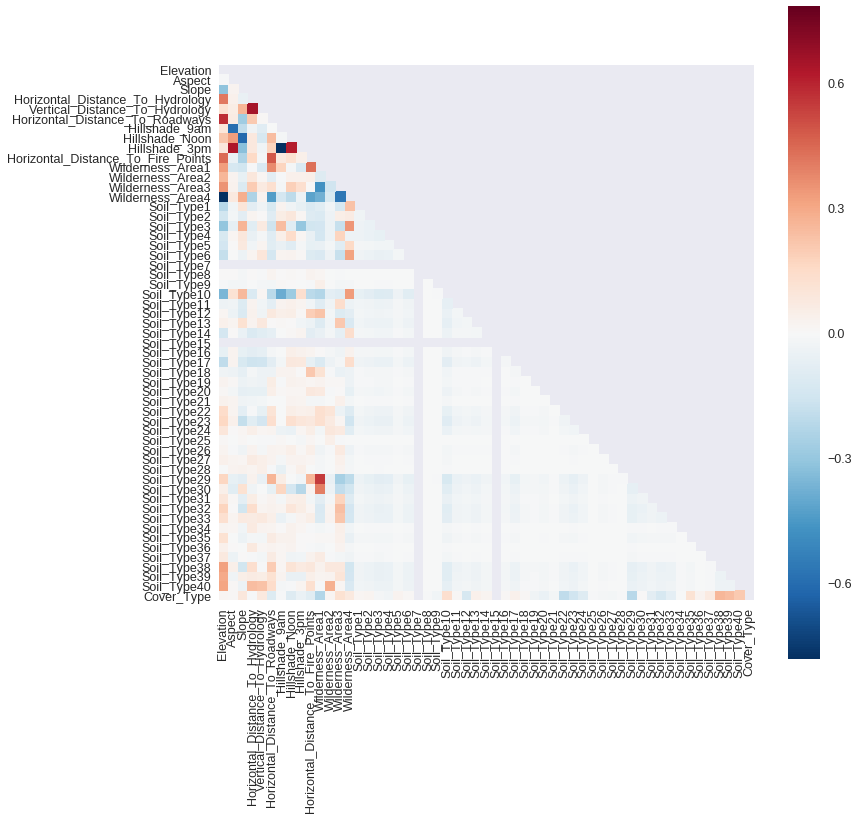

In [25]:
import seaborn as sns
corr = df_train[subcols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)
f,ax = plt.subplots(1,1,figsize=(12,12))
_ = sns.heatmap(corr, mask=mask, vmax=0.5, square=True, ax=ax)

In [26]:
from collections import defaultdict, OrderedDict
# Pairs correlated stronger than +0.4

pairs = defaultdict(list)
for col in corr.columns:
    curr = list(corr[col][(abs(corr[col])>=0.4) & (corr[col]!=1)].index)
    if len(curr)>0 and not any([col in v for v in pairs.values()]):
        pairs[col]=curr
pairs

defaultdict(list,
            {'Aspect': ['Hillshade_9am', 'Hillshade_3pm'],
             'Elevation': ['Horizontal_Distance_To_Hydrology',
              'Horizontal_Distance_To_Roadways',
              'Horizontal_Distance_To_Fire_Points',
              'Wilderness_Area4'],
             'Slope': ['Hillshade_Noon'],
             'Vertical_Distance_To_Hydrology': ['Horizontal_Distance_To_Hydrology'],
             'Wilderness_Area1': ['Horizontal_Distance_To_Fire_Points',
              'Wilderness_Area3',
              'Soil_Type29',
              'Soil_Type30']})

In [27]:
df_train_copy = df_train.copy()
df_train_copy.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [28]:
df_train_copy = df_train_copy.drop(['Id'],axis = 1)

In [29]:
df_train_copy.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


/home/preeti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


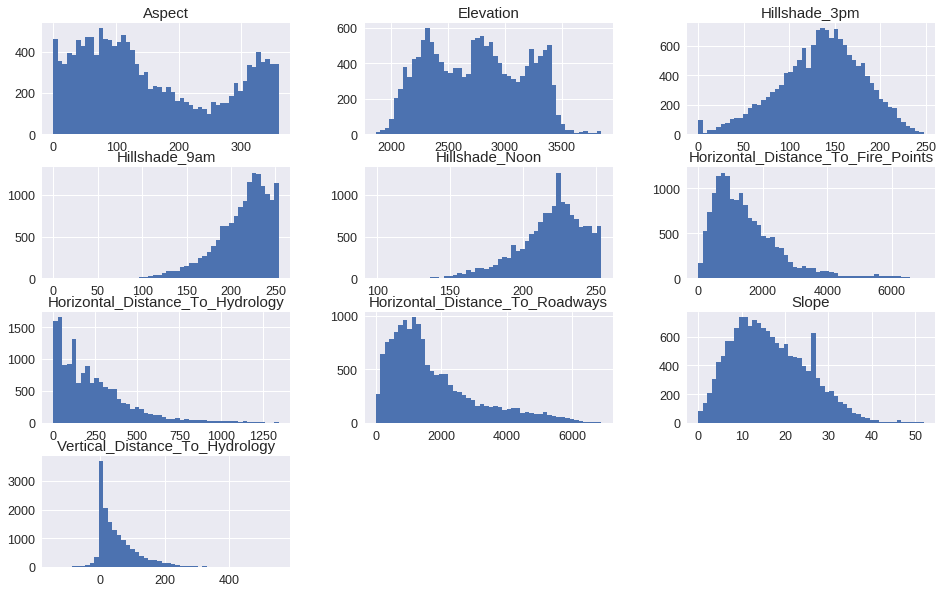

In [30]:
df_train_copy.ix[:,:10].hist(figsize=(16,10), bins=50)
plt.show() 

In [31]:
smaller_frame=df_train[['Elevation', 
                        'Horizontal_Distance_To_Roadways', 
                        'Horizontal_Distance_To_Fire_Points', 
                        'Horizontal_Distance_To_Hydrology', 
                        'Vertical_Distance_To_Hydrology',
                        'Wilderness_Area4']] 
smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Horizontal_Distance_To','HD')) 
smaller_frame.columns=smaller_frame.columns.map(lambda x: x.replace('Vertical_Distance_To','VD'))
#add Cover Type to smaller_frame so we can color code. 
smaller_frame['Cover_Type']=df_train.Cover_Type 

/home/preeti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


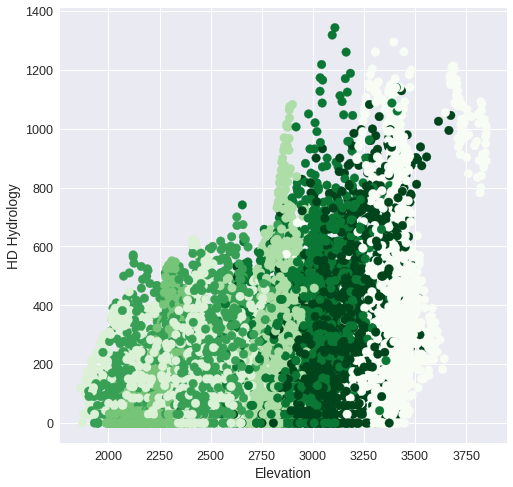

In [32]:
#Elevation vs HD Hydrology 
plt.figure(figsize=(8,8)) 
plt.scatter(smaller_frame.Elevation, smaller_frame.HD_Hydrology, c=smaller_frame.Cover_Type, s=75, cmap=plt.cm.Greens_r) 
plt.xlabel("Elevation") 
plt.ylabel("HD Hydrology") 
plt.show() 